In [1]:
import pandas as pd 
df = pd.read_csv("books_page1.csv")
df.head()

,Title,Price
0,A Light in the Attic,Â£51.77
1,Tipping the Velvet,Â£53.74
2,Soumission,Â£50.10
3,Sharp Objects,Â£47.82
4,Sapiens: A Brief History of Humankind,Â£54.23


In [2]:
df.info()
df.describe()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   20 non-null     object
 1   Price   20 non-null     object
dtypes: object(2)
memory usage: 452.0+ bytes
Index(['Title', 'Price'], dtype='object')


In [3]:
df.isnull().sum()

Title    0
Price    0
dtype: int64

In [7]:
df["Price"] = df["Price"].str.replace("£", "").astype(float)

AttributeError: Can only use .str accessor with string values!

In [5]:
print(df["Price"].unique())

['Â£51.77' 'Â£53.74' 'Â£50.10' 'Â£47.82' 'Â£54.23' 'Â£22.65' 'Â£33.34'
 'Â£17.93' 'Â£22.60' 'Â£52.15' 'Â£13.99' 'Â£20.66' 'Â£17.46' 'Â£52.29'
 'Â£35.02' 'Â£57.25' 'Â£23.88' 'Â£37.59' 'Â£51.33' 'Â£45.17']


In [6]:
df["Price"] = df["Price"].str.replace("£", "", regex=False)      # Remove £
df["Price"] = df["Price"].str.replace("Â", "", regex=False)      # Remove stray Â if exists
df["Price"] = df["Price"].str.strip()                            # Remove leading/trailing spaces
df["Price"] = df["Price"].astype(float)

In [8]:
print(df["Price"].describe())
print("Average Price:", df["Price"].mean())

count    20.000000
mean     38.048500
std      15.135231
min      13.990000
25%      22.637500
50%      41.380000
75%      51.865000
max      57.250000
Name: Price, dtype: float64
Average Price: 38.048500000000004


In [9]:
df.sort_values(by="Price", ascending=False).head(5)  # Most expensive
df.sort_values(by="Price").head(5)                  

,Title,Price
10,"Starving Hearts (Triangular Trade Trilogy, #1)",13.99
12,Set Me Free,17.46
7,The Coming Woman: A Novel Based on the Life of...,17.93
11,Shakespeare's Sonnets,20.66
8,The Boys in the Boat: Nine Americans and Their...,22.60


In [10]:
df["Price"].mean()

38.048500000000004

In [11]:
df[df.duplicated("Title")]

,Title,Price


In [12]:
expensive_books = df[df["Price"] > 50]
print(len(expensive_books), "books priced over £50")

8 books priced over £50


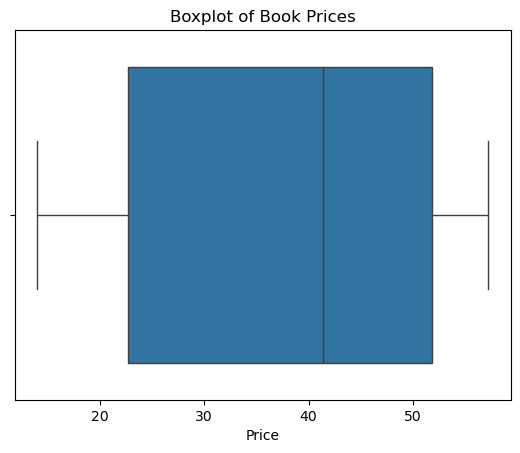

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["Price"])
plt.title("Boxplot of Book Prices")
plt.show()

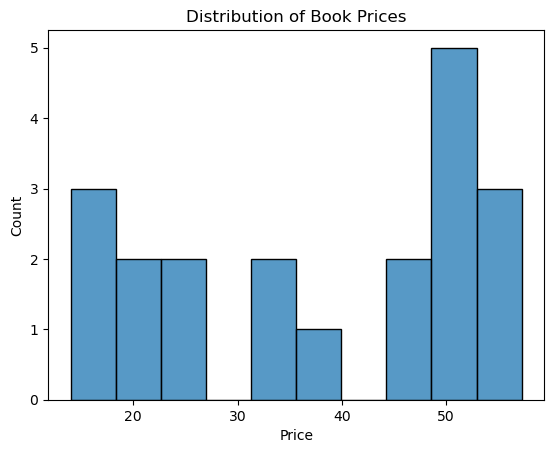

In [14]:
sns.histplot(df["Price"], bins=10)
plt.title("Distribution of Book Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()